#### Assignment 2
##### Name     - L.H.N. WIJEWARDENA
##### Index No - 190713X

Question 1

In [2]:
import cv2 as cv
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import random
import matplotlib.pyplot as plt

x =  -0.2797229609427236
y =  -0.2660394879459763
r =  10.543055967495711


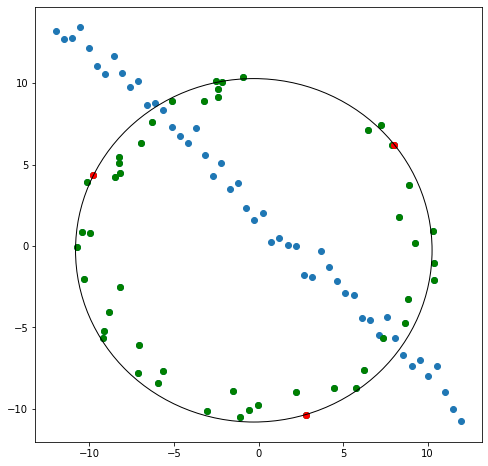

In [6]:


N = 100

half_n = N//2
r = 10
s = r /16
t = np.random.uniform(0 , 2*np.pi , half_n)
n = s*np.random.randn (half_n)

x , y = (r+n)*np.cos(t) , (r+n)*np.sin(t)
X_circ = np.hstack ((x.reshape(half_n , 1) , y.reshape(half_n , 1)))

m, b = -1, 2
x = np.linspace (-12, 12 , half_n )
y = m*x + b + s*np.random.randn(half_n)
X_line = np . hstack (( x.reshape (half_n , 1) , y.reshape(half_n , 1)))

X = np.vstack((X_circ , X_line))


def random_sample(list):
    sample_list = []
    rand_nums = random.sample(range(1, len(list)), 3)
    for i in rand_nums:
        sample_list.append((list[i][0], list[i][1]))
    return sample_list

def model(sample):
	
    p1 = sample[0]
    p2 = sample[1]
    p3 = sample[2]

    temp = p2[0] * p2[0] + p2[1] * p2[1]
    bc = (p1[0] * p1[0] + p1[1] * p1[1] - temp) / 2
    cd = (temp - p3[0] * p3[0] - p3[1] * p3[1]) / 2
    det = (p1[0] - p2[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p2[1])


    # Center of circle
    c_x = (bc*(p2[1] - p3[1]) - cd*(p1[1] - p2[1])) / det
    c_y = ((p1[0] - p2[0]) * cd - (p2[0] - p3[0]) * bc) / det

    r = np.sqrt((c_x - p1[0])**2 + (c_y - p1[1])**2)
    
    return c_x, c_y, r

def inliers(x_data, y_data, c_x, c_y, r):
    inliers = []
    d = r + r//5

    for i in range(len(x_data)):
        dis = np.sqrt((x_data[i]-c_x)**2 + (y_data[i]-c_y)**2)
        if dis < d:
            inliers.append(i)

    return inliers


max_inliers = []
x_data = X_circ[:,0]
y_data = X_circ[:,1]
radius = 0
center_x = 0
center_y = 0

for i in range(0,1000):
    sample_list = random_sample(X_circ)
    c_x, c_y, r = model(sample_list)
   
    inlier_list = inliers(x_data, y_data, c_x, c_y, r)
    if len(inlier_list)>len(max_inliers):
        max_inliers = inlier_list
        radius = r
        center_x = c_x
        center_y = c_y
        samples = sample_list

#print(max_inliers)
print("x = " ,center_x)
print("y = " ,center_y)
print("r = " ,radius)

plt.figure(figsize=(8,8))
circle = plt.Circle(( center_x , center_y ), radius, fill=False )
fig = plt.gcf()
ax = fig.gca() 
ax.add_patch(circle)  
plt.scatter(X[:,0],X[:,1])
for i in max_inliers:
    plt.scatter(X[i][0],X[i][1] , c = "g")

plt.scatter([samples[0][0], samples[1][0], samples[2][0]] , [samples[0][1], samples[1][1], samples[2][1]] , c ="r")

Question 2

In [3]:
# Function to find the points in the image using left mouse click

def click(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print(x, " ", y)


In [23]:
#img1 = cv.imread("002.jpg")
img1 = cv.imread("building.jpg")
assert img1 is not None
cv.imshow("Image 1",img1)
cv.setMouseCallback("Image 1",click)
cv.waitKey(0)

#img2 = cv.imread("Flag_of_the_United_Kingdom.svg.png")
img2 = cv.imread("batman.jpg")
assert img2 is not None
cv.imshow("Image 2",img2)
cv.setMouseCallback("Image 2",click)
cv.waitKey(0)
cv.destroyAllWindows()

99   42
254   91
32   316
277   322


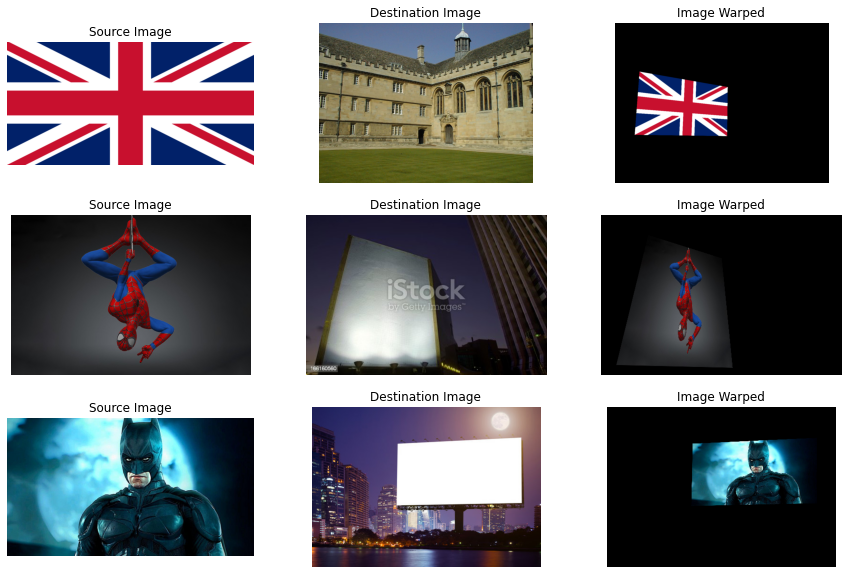

In [42]:

img_dst1 = cv.imread("002.jpg")
img_dst2 = cv.imread("building.jpg")
img_dst3 = cv.imread("banner.jpg")

# Four corners in the destination image
pts_dst1 = np.array([[117, 233], [94, 536], [539, 307],[536, 542]])
pts_dst2 = np.array([[99, 42], [254, 91], [32, 316], [277, 322]])
pts_dst3 = np.array([[192, 82], [470, 69], [189, 222], [470, 216]])

img_src1 = cv.imread("Flag_of_the_United_Kingdom.svg.png")
img_src2 = cv.imread("spider.jpg")
img_src3 = cv.imread("batman.jpg")

# Four corners in the source image.
pts_src1 = np.array([[0, 0], [0, 958], [1919, 0],[1919, 958]])
pts_src2 = np.array([[0, 0], [959, 0], [0, 640], [959, 640]])
pts_src3 = np.array([[0, 0], [1199, 0], [0, 674], [1199, 674]])

# Calculate Homography
h1, status1 = cv.findHomography(pts_src1, pts_dst1)
h2, status2 = cv.findHomography(pts_src2, pts_dst2)
h3, status3 = cv.findHomography(pts_src3, pts_dst3)

# Warp source image to destination based on homography
img_out1 = cv.warpPerspective(img_src1, h1, (img_dst1.shape[1],img_dst1.shape[0]))
img_out2 = cv.warpPerspective(img_src2, h2, (img_dst2.shape[1],img_dst2.shape[0]))
img_out3 = cv.warpPerspective(img_src3, h3, (img_dst3.shape[1],img_dst3.shape[0]))

fig,ax=plt.subplots(3,3,figsize=(15,10))

ax[0][0].imshow(cv.cvtColor(img_src1,cv.COLOR_BGR2RGB))
ax[0][0].set_title("Source Image")
ax[0][0].axis("off")
ax[0][1].imshow(cv.cvtColor(img_dst1,cv.COLOR_BGR2RGB))
ax[0][1].set_title("Destination Image")
ax[0][1].axis("off")
ax[0][2].imshow(cv.cvtColor(img_out1,cv.COLOR_BGR2RGB))
ax[0][2].set_title("Image Warped")
ax[0][2].axis("off")

ax[1][0].imshow(cv.cvtColor(img_src2,cv.COLOR_BGR2RGB))
ax[1][0].set_title("Source Image")
ax[1][0].axis("off")
ax[1][1].imshow(cv.cvtColor(img_dst2,cv.COLOR_BGR2RGB))
ax[1][1].set_title("Destination Image")
ax[1][1].axis("off")
ax[1][2].imshow(cv.cvtColor(img_out2,cv.COLOR_BGR2RGB))
ax[1][2].set_title("Image Warped")
ax[1][2].axis("off")

ax[2][0].imshow(cv.cvtColor(img_src3,cv.COLOR_BGR2RGB))
ax[2][0].set_title("Source Image")
ax[2][0].axis("off")
ax[2][1].imshow(cv.cvtColor(img_dst3,cv.COLOR_BGR2RGB))
ax[2][1].set_title("Destination Image")
ax[2][1].axis("off")
ax[2][2].imshow(cv.cvtColor(img_out3,cv.COLOR_BGR2RGB))
ax[2][2].set_title("Image Warped")
ax[2][2].axis("off")


plt.show()



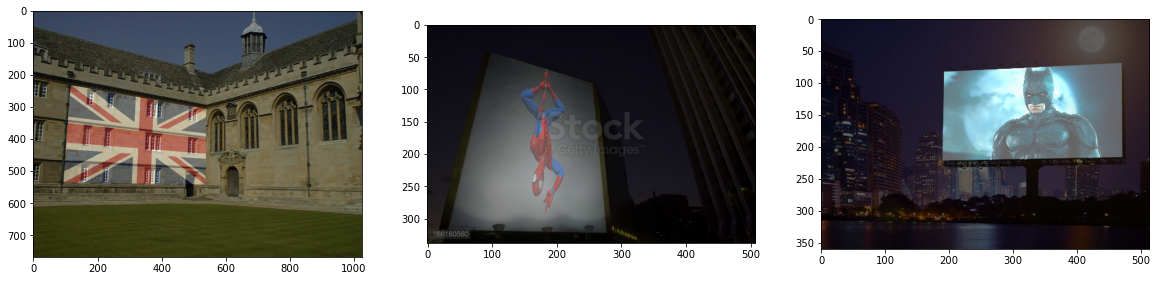

In [28]:
# Blending Images
alpha = 0.65
beta = 1-alpha

blended_1 = cv.addWeighted(img_dst1, alpha, img_out1, beta, 0.0)
blended_2 = cv.addWeighted(img_dst2, 0.4, img_out2, 0.6, 0.0)
blended_3 = cv.addWeighted(img_dst3, 0.4, img_out3, 0.6, 0.0)

fig, ax = plt.subplots(1,3,figsize= (20,20))
ax[0].imshow(cv.cvtColor(blended_1,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(blended_2,cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(blended_3,cv.COLOR_BGR2RGB))

Question 3

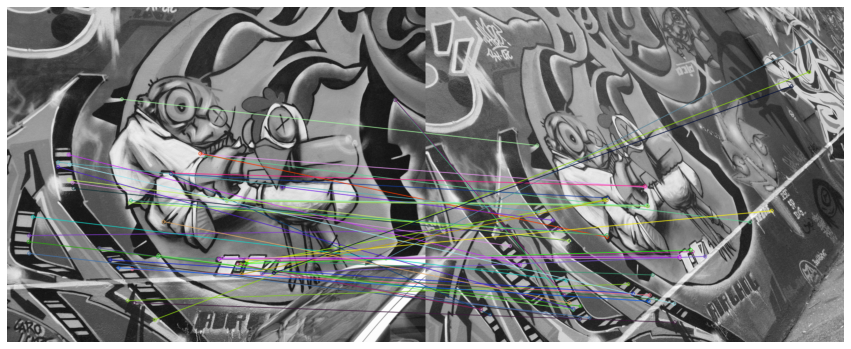

In [60]:
#Match sift features
img11 = cv.imread('img1.ppm')  
img22 = cv.imread('img4.ppm')

img1 = cv.cvtColor(img11,cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img22,cv.COLOR_BGR2GRAY)

# sift = cv.SIFT_create()
# keypoint_1, descriptors_1 = sift.detectAndCompute(img1,None)
# keypoint_2, descriptors_2 = sift.detectAndCompute(img2,None)
# bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

orb = cv.ORB_create()
keypoint_1, descriptors_1 = orb.detectAndCompute(img1,None)
keypoint_2, descriptors_2 = orb.detectAndCompute(img2,None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)



matches = bf.match(descriptors_1,descriptors_2)
#sorting to get the best matches
matches = sorted(matches, key = lambda x:x.distance)

fig, ax = plt.subplots(figsize = (15,15))
ax.axis('off')
matched_img = cv.drawMatches(img1, keypoint_1, img2, keypoint_2, matches[:50], img2, flags = 2)
plt.imshow(cv.cvtColor(matched_img,cv.COLOR_BGR2RGB))
plt.show()

In [72]:
# Function for calculating homography
def calculateHomography(correspondences):
    #loop through correspondences and create assemble matrix
    aList = []
    for corr in correspondences:
        p1 = np.matrix([corr.item(0), corr.item(1), 1])
        p2 = np.matrix([corr.item(2), corr.item(3), 1])

        a2 = [0, 0, 0, -p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2),
              p2.item(1) * p1.item(0), p2.item(1) * p1.item(1), p2.item(1) * p1.item(2)]
        a1 = [-p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2), 0, 0, 0,
              p2.item(0) * p1.item(0), p2.item(0) * p1.item(1), p2.item(0) * p1.item(2)]
        aList.append(a1)
        aList.append(a2)

    matrixA = np.matrix(aList)

    #svd composition
    u, s, v = np.linalg.svd(matrixA)

    #reshape the min singular value into a 3 by 3 matrix
    h = np.reshape(v[8], (3, 3))

    #normalize and now we have h
    h = (1/h.item(8)) * h
    return h

In [73]:
#Calculate the geometric distance between estimated points and original points
#
def geometricDistance(correspondence, h):

    p1 = np.transpose(np.matrix([correspondence[0].item(0), correspondence[0].item(1), 1]))
    estimatep2 = np.dot(h, p1)
    estimatep2 = (1/estimatep2.item(2))*estimatep2

    p2 = np.transpose(np.matrix([correspondence[0].item(2), correspondence[0].item(3), 1]))
    error = p2 - estimatep2
    return np.linalg.norm(error)


In [74]:
def ransac(corr, thresh):
    maxInliers = []
    finalH = None
    for i in range(1000):
        #find 4 random points to calculate a homography
        corr1 = corr[random.randrange(0, len(corr))]
        corr2 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((corr1, corr2))
        corr3 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((randomFour, corr3))
        corr4 = corr[random.randrange(0, len(corr))]
        randomFour = np.vstack((randomFour, corr4))

        #call the homography function on those points
        h = calculateHomography(randomFour)
        inliers = []

        for i in range(len(corr)):
            d = geometricDistance(corr[i], h)
            if d < 5:
                inliers.append(corr[i])

        if len(inliers) > len(maxInliers):
            maxInliers = inliers
            finalH = h
        print ("Corr size: ", len(corr), " NumInliers: ", len(inliers), "Max inliers: ", len(maxInliers))

        if len(maxInliers) > (len(corr)*thresh):
            break
    return finalH, maxInliers


In [ ]:
correspondenceList = []
keypoints = [keypoint_1,keypoint_2]
  
args, img_name = getopt.getopt(sys.argv[1:],'', ['threshold='])
args = dict(args)
estimation_thresh = args.get('--threshold')

for match in matches:
    (x1, y1) = keypoints[0][match.queryIdx].pt
    (x2, y2) = keypoints[1][match.trainIdx].pt
    correspondenceList.append([x1, y1, x2, y2])

corrs = np.matrix(correspondenceList)

#run ransac algorithm
finalH, inliers = ransac(corrs, estimation_thresh)
print ("Final homography: ", finalH)
print ("Final inliers count: ", len(inliers))




In [61]:
x_1 = [93,-7]
y_1 = [63,0]
x_2 = [293,3]
y_2 = [868,-6]
x_3 = [1207,7]
y_3 = [998,-4]
x_4 = [1218,3]
y_4 = [309,2]

P = np.array([
    [-x_1[0], -y_1[0], -1, 0, 0, 0, x_1[0]*x_1[1], y_1[0]*x_1[1], x_1[1]],
    [0, 0, 0, -x_1[0], -y_1[0], -1, x_1[0]*y_1[1], y_1[0]*y_1[1], y_1[1]],
    [-x_2[0], -y_2[0], -1, 0, 0, 0, x_2[0]*x_2[1], y_2[0]*x_2[1], x_2[1]],
    [0, 0, 0, -x_2[0], -y_2[0], -1, x_2[0]*y_2[1], y_2[0]*y_2[1], y_2[1]],
    [-x_3[0], -y_3[0], -1, 0, 0, 0, x_3[0]*x_3[1], y_3[0]*x_3[1], x_3[1]],
    [0, 0, 0, -x_3[0], -y_3[0], -1, x_3[0]*y_3[1], y_3[0]*y_3[1], y_3[1]],
    [-x_4[0], -y_4[0], -1, 0, 0, 0, x_4[0]*x_4[1], y_4[0]*x_4[1], x_4[1]],
    [0, 0, 0, -x_4[0], -y_4[0], -1, x_4[0]*y_4[1], y_4[0]*y_4[1], y_4[1]],
    ])

[U, S, Vt] = np.linalg.svd(P)
homography = Vt[-1].reshape(3, 3)